<a href="https://colab.research.google.com/github/Kaderbalde/EXERCISE/blob/main/Mamadou_Cir%C3%A9_Kader_Bald%C3%A9_Contr%C3%B4le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercice 2**

1. Selon vous, pourquoi doit-on traiter les valeurs aberrantes ?

On traite les valeurs aberrantes ou outliers pour ne pas impacter de facons significatives l'ensemble des obervations donc fausser les conclusions.

2. Utilisez l'algorithme (vu en TP) pour remplacer les valeurs aberrantes pour les variables
'QuantityOrdered' et 'PriceEach' puis vérifiez qu'elles ont bien été remplacées (preuve à l'appui)

Importation du package

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Importation du data set

In [ ]:
df = pd.read_csv('salesData.csv')

In [7]:
df.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Day,Month,Year,PurchaseAddress
0,295665.0,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,30.0,12.0,2019.0,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,29.0,12.0,2019.0,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,NaN,2019-12-12 18:21:00,12.0,12.0,2019.0,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,22.0,12.0,2019.0,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,18.0,12.0,2019.0,"43 Hill St, Atlanta, GA 30301"


Vérification des valeurs aberantes

In [20]:
df.isna().sum()

OrderID             0
Product             1
QuantityOrdered    16
PriceEach           7
OrderDate           1
Day                 1
Month               1
Year                1
PurchaseAddress     1
dtype: int64

Vérification des données statistiques

In [22]:
df.describe()

,OrderID,QuantityOrdered,PriceEach,Day,Month,Year
count,19549.000000,19533.00000,19542.000000,19548.000000,19548.000000,19548.000000
mean,305054.428360,1.12763,183.100105,16.041897,11.984807,2019.001381
std,5435.816592,0.45009,332.406459,8.891825,0.408540,0.037140
min,286216.000000,1.00000,2.990000,1.000000,1.000000,2019.000000
25%,300343.000000,1.00000,11.950000,8.000000,12.000000,2019.000000
50%,305042.000000,1.00000,14.950000,16.000000,12.000000,2019.000000
75%,309761.000000,1.00000,150.000000,24.000000,12.000000,2019.000000
max,314467.000000,7.00000,1700.000000,31.000000,12.000000,2020.000000


Suppression des valeurs manquantes (question 3 Exercice 1)

In [28]:
df.dropna(inplace=True)

In [29]:
df.isna().sum()

OrderID            0
Product            0
QuantityOrdered    0
PriceEach          0
OrderDate          0
Day                0
Month              0
Year               0
PurchaseAddress    0
dtype: int64

In [31]:
df.isnull()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Day,Month,Year,PurchaseAddress
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
19543,False,False,False,False,False,False,False,False,False
19544,False,False,False,False,False,False,False,False,False
19545,False,False,False,False,False,False,False,False,False
19546,False,False,False,False,False,False,False,False,False


<Axes: >

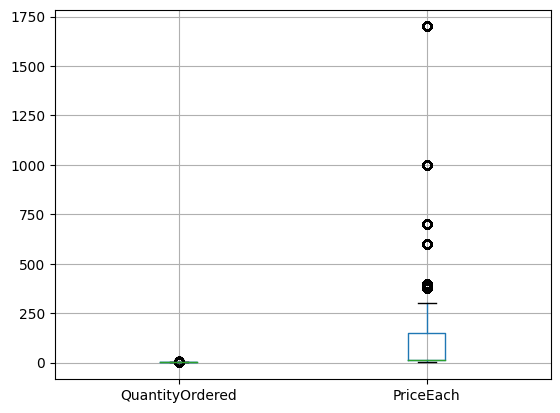

In [30]:
df[['QuantityOrdered','PriceEach']].boxplot()

In [12]:
##traitement des valeurs aberrantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19549 entries, 0 to 19548
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          19549 non-null  float64
 1   Product          19548 non-null  object 
 2   QuantityOrdered  19533 non-null  float64
 3   PriceEach        19542 non-null  float64
 4   OrderDate        19548 non-null  object 
 5   Day              19548 non-null  float64
 6   Month            19548 non-null  float64
 7   Year             19548 non-null  float64
 8   PurchaseAddress  19548 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.3+ MB


Remplacement des valeurs aberantes

In [34]:
def impute_outliers(df, colname):
    q1 = np.percentile(df[colname], 25)
    q3 = np.percentile(df[colname], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    df.loc[(df[colname] < lower_bound), colname] = lower_bound
    df.loc[(df[colname] > upper_bound), colname] = upper_bound

In [35]:
for colname in df.columns:
    impute_outliers(df, colname)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U22'), dtype('<U22')) -> None

<Axes: >

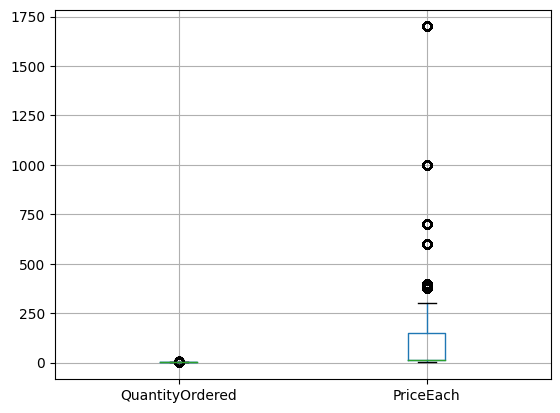

In [36]:
df[['QuantityOrdered','PriceEach']].boxplot()

3. En quoi l'imputation de valeurs aberrantes pourrait avoir un impact négatif sur l'analyse des
données ?
Reponse: Le non traitement des valeurs aberrantes, conduites à deformer les données, à fausser l'analyse donc à la prise d'une decision erronées.

**Exercice 1**

1. Expliquer comment les données dupliquées pourraient impacter les analyses futures
**Eviter les biais dans les analyses statistiques descriptives** : Si les données dupliquées ne sont pas correctement identifiées et traitées, elles peuvent fausser les statistiques descriptives telles que la moyenne, l'écart type, la médiane, etc. Cela peut conduire à des conclusions erronées sur la distribution des données et sur la variabilité des variables.

**Distorsion des résultats d'analyse **: Lorsque des données dupliquées sont incluses dans des analyses statistiques ou des modèles d'apprentissage automatique, elles peuvent introduire un biais dans les résultats.

**Sur-estimation de la performance des modèles** : Si les données dupliquées ne sont pas éliminées avant de construire des modèles d'apprentissage automatique, cela peut conduire à une sur-estimation de la performance du modèle.

**Perte d'efficacité et de ressources** : Les données dupliquées peuvent entraîner une perte d'efficacité et de ressources lors de l'exécution d'analyses ou de modèles, car elles augmentent la taille des données sans fournir de nouvelles informations utiles. Cela peut entraîner une consommation excessive de ressources computationnelles et de temps de traitement.

Donc compromet l'intégrité et la validité des analyses futures, ce qui souligne l'importance de les détecter et de les traiter correctement dès le début du processus d'analyse de données.

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


4. Dire en quoi l'imputation de valeurs manquantes pourrait avoir un impact négatif pour l'analyse
des données ?

l'imputation des valeurs manquantes peut avoir un impacte negatif si la methode chois n'est pas adéquoit et judicieuse.


5. Créez une nouvelle colonne nommée 'Hour' à partir de la colonne 'OrderDate' pour extraire les
heures de vente des produits.

In [44]:
df.head()

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Day,Month,Year,PurchaseAddress
0,295665.0,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,30.0,12.0,2019.0,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,29.0,12.0,2019.0,"562 2nd St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,22.0,12.0,2019.0,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,18.0,12.0,2019.0,"43 Hill St, Atlanta, GA 30301"
5,295670.0,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,31.0,12.0,2019.0,"200 Jefferson St, New York City, NY 10001"


6. Extrayez également une colonne nommée 'City' à partir de la variable 'PurchaseAddress

In [43]:
df.rename(columns ={'Day': 'Hour'})

,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Hour,Month,Year,PurchaseAddress
0,295665.0,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,30.0,12.0,2019.0,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,29.0,12.0,2019.0,"562 2nd St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,22.0,12.0,2019.0,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,18.0,12.0,2019.0,"43 Hill St, Atlanta, GA 30301"
5,295670.0,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,31.0,12.0,2019.0,"200 Jefferson St, New York City, NY 10001"
...,...,...,...,...,...,...,...,...,...
19543,314463.0,Wired Headphones,1.0,11.99,2019-12-09 00:26:00,9.0,12.0,2019.0,"116 Willow St, San Francisco, CA 94016"
19544,314464.0,AAA Batteries (4-pack),1.0,2.99,2019-12-11 19:47:00,11.0,12.0,2019.0,"656 2nd St, New York City, NY 10001"
19545,314465.0,Bose SoundSport Headphones,1.0,99.99,2019-12-08 12:48:00,8.0,12.0,2019.0,"44 Cherry St, Los Angeles, CA 90001"
19546,314466.0,Flatscreen TV,1.0,300.00,2019-12-29 20:00:00,29.0,12.0,2019.0,"751 Sunset St, Boston, MA 02215"


,OrderID,Product,QuantityOrdered,PriceEach,OrderDate,Hour,Month,Year,PurchaseAddress
0,295665.0,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,30.0,12.0,2019.0,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,29.0,12.0,2019.0,"562 2nd St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,22.0,12.0,2019.0,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,18.0,12.0,2019.0,"43 Hill St, Atlanta, GA 30301"
5,295670.0,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,31.0,12.0,2019.0,"200 Jefferson St, New York City, NY 10001"
...,...,...,...,...,...,...,...,...,...
19543,314463.0,Wired Headphones,1.0,11.99,2019-12-09 00:26:00,9.0,12.0,2019.0,"116 Willow St, San Francisco, CA 94016"
19544,314464.0,AAA Batteries (4-pack),1.0,2.99,2019-12-11 19:47:00,11.0,12.0,2019.0,"656 2nd St, New York City, NY 10001"
19545,314465.0,Bose SoundSport Headphones,1.0,99.99,2019-12-08 12:48:00,8.0,12.0,2019.0,"44 Cherry St, Los Angeles, CA 90001"
19546,314466.0,Flatscreen TV,1.0,300.00,2019-12-29 20:00:00,29.0,12.0,2019.0,"751 Sunset St, Boston, MA 02215"


In [ ]:
df.rename(columns ={'PurchaseAddress': 'City'})

In [ ]:
df.head()

**Exercice 3 **
1.Donner la nature de variables pouvant être représentée(s) par chacune de méthodes suivantes:
Scatter plot  ----variables continues
boxplot ---- la distribution des variables continues ou ordinales
diagramme en barres  ----variables catégoriques ou nominales
histogramme  ----variables continues
heatmap  ---- variables continues ou catégoriques



2. On veut étudier les éventuelles corrélations entre le temps de travail et le salaire des employés
(hommes et femmes) en fonction de leur niveau d'études, interpréter les graphiques suivants:
-Niveau bac +2: nous notons que plus de femmes travaillent plus de 37.5 heures que les hommes et par consequent ont  un salaire superieur aux hommes soit 600000, plus d'hommes font moins de 26h de travaille que les hommes avec un salaire de moins de 400000
-niveau Bac +4: nous observons que plus d'hommes font plus de 37h de travaille et ont le plus grand salaire
-Niveau Bac +6: les hommes et femmes font tous plus de 37h de travails sur la deuxième groupe, et l'autre groupe les femmes et hommes sont fortement corrélé avec un salaire maximum de 300000.
NB: sur l'ensemble des graphes, les salaire est proportionnel aux heures de travail quelque soit le diplome.

3. On veut maintenat étudier les éventuelles corrélations entre le temps de travail et le salaire des
employés (hommes et femmes), non pas en fonction du niveau d'études, mais plutôt en fonction
de leur expérience (stagiaire, junior, senior), interpréter les graphiques suivants:
-**Junior**:nous observons que le salaire maximum des masculins et feminins est inferieur à 400000, les femmes font plus de 35h de travail que les hommes. Nous n'observons pas d'écart significative entre les salaires des hommes et des femmes. Il y a plus de masculin que de feminin. Le salaire maximal est detenu apr les masculins
-**Stagiaire**:nous observons que le salaire maximum des masculin et feminin est inferieur à 400000, les feminin font plus de 35h de travail que les hommes. Nous n'observons pas d'écart significative entre les salaires des hommes et des femmes. le salaire maximal est detenu par les feminins
**-Senior**:nous observons que le salaire minium est de 300000 des masculin et feminin,  les feminin font plus de 35h de travail que les hommes. Nous n'observons pas d'écart significative entre les salaires des hommes et des femmes. le salaire maximal est detenu par les feminins, le temps minimum de travail est de 37h environs.